[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/PongthepGeo/ML_22/blob/master/course_objective.ipynb)

### Course objectives

This course aims to solve a problem in crop classification using satellite imagery. The study area is located in Nakhonratchasima province, North-East of Thailand, where farmers plan cassavas, maize, rice, and sugarcane. We are machine learners who will apply ML-based and DL-based approaches to an inference model that can classify crops automatically.

The subjects in this course will cover decision-tree-base methods used [catboost](https://catboost.ai/) and the some DL methods, such as U-net. 

#### 1. Install Python libraries

In [ ]:
%pip install geopandas
%pip install matplotlib
%pip install rasterio
%pip install ipykernel

In [ ]:
!pip list

#### 2. Load Python libraries

In [ ]:
%matplotlib inline

import rasterio
import geopandas as gpd
import matplotlib.pyplot as plt

from rasterio.features import rasterize
from rasterio.plot import show

Adding %matplotlib inline before importing Python libraries can help **matplotlib** plot a static image, whereas %matplotlib notebook is used for interactive visualization.

#### 3. Exploring data 

The metadata contain georeferences that can detach into two main groups, first geocoordinates (strings and vector) and second array (satellite images). We will use **rasterio** and **geopandas** to manipulate the metadata.

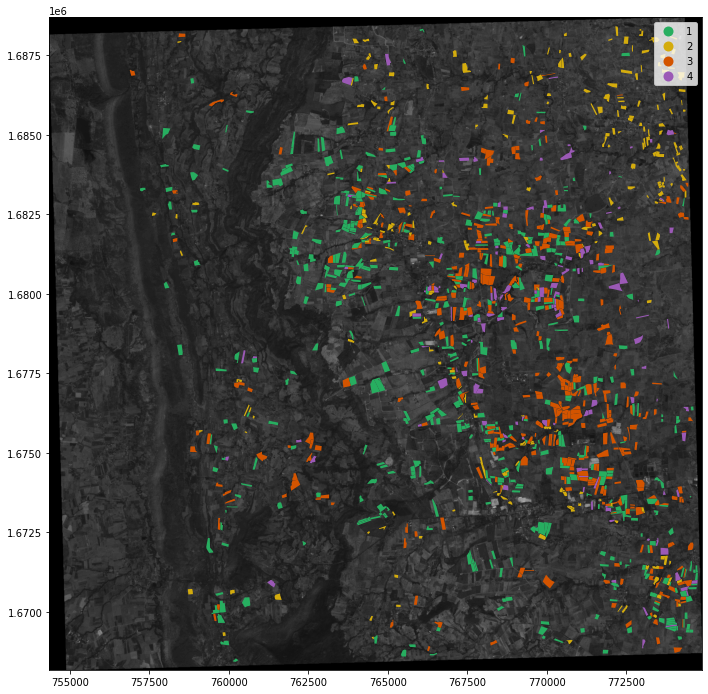

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import rasterio

from rasterio.plot import show

shape_file = gpd.read_file('../datasets/shape_files/traindata.shp')
src = rasterio.open('../datasets/sentinel_2/2020/20200107/IMG_DATA/47PQS_20200107_B03.jp2')
# print(shape_file)
# shape_file = shape_file[['crop_type']]
# print(shape_file)

# NOTE plot
_, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 12))
facies_colors = ['#27AE60', '#D4AC0D', '#D35400', '#9B59B6']
crop_colors = colors.ListedColormap(facies_colors[0:len(facies_colors)], 'indexed')
shape_file.plot(ax=ax, column='crop_type', cmap=crop_colors, legend=True)
show(src.read(), transform=src.transform, ax=ax, cmap='gray')
plt.savefig('pictures/demo' + '.svg', format='svg', bbox_inches='tight', transparent=True, pad_inches=0)
plt.show()